Mounting Google Drive

In [1]:

!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing libraries

In [2]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

import numpy as np

from utils import (
   test, train, plot_losses, plot_incorrect_prediction

)

from model import Net
from torchsummary import summary

from torch.optim.lr_scheduler import StepLR
%matplotlib inline

Updating Device to CUDA

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu") #c2

CUDA Available? True


Defining data tranformations

In [4]:
train_transforms = transforms.Compose([
    transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation((-10., 10.), fill=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])


Downloading MNIST dataset and splitting to train and test set

In [5]:
train_data = datasets.CIFAR10('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 170498071/170498071 [00:05<00:00, 28608443.47it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [6]:
classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Creating Data Loaders from train data and test data

In [7]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

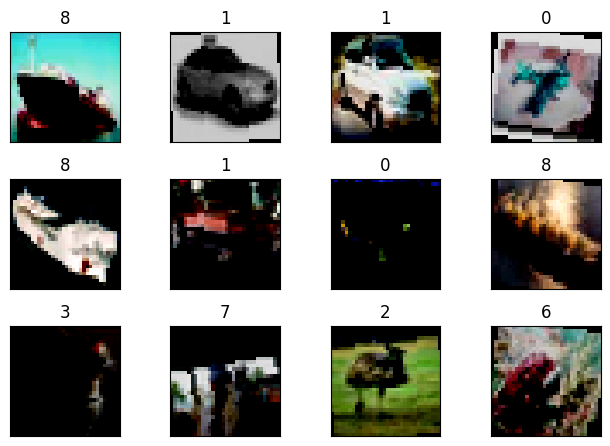

In [8]:
batch_data, batch_label = next(iter(train_loader))
fig = plt.figure()
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(np.transpose(batch_data[i], (1, 2, 0)), cmap='gray')
    plt.title(batch_label[i].item())
    plt.xticks([])
    plt.yticks([])
plt.show()

Transferring model to GPU and printing model summary

In [9]:
model1 = Net(norm="BN").to(device)
summary(model1, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
       BatchNorm2d-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 10, 32, 32]             900
              ReLU-6           [-1, 10, 32, 32]               0
       BatchNorm2d-7           [-1, 10, 32, 32]              20
           Dropout-8           [-1, 10, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             160
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 24, 16, 16]           3,456
             ReLU-12           [-1, 24, 16, 16]               0
      BatchNorm2d-13           [-1, 24, 16, 16]              48
          Dropout-14           [-1, 24,

In [10]:
model =  Net(norm='BN').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer)
    test(model, device, test_loader)

EPOCH: 0


Train: Loss=1.6200 Batch_id=97 Accuracy=32.43: 100%|██████████| 98/98 [00:49<00:00,  2.00it/s]


Test set: Average loss: 1.5947, Accuracy: 4144/10000 (41.44%)

EPOCH: 1


Train: Loss=1.3155 Batch_id=97 Accuracy=47.46: 100%|██████████| 98/98 [00:50<00:00,  1.94it/s]


Test set: Average loss: 1.3517, Accuracy: 5020/10000 (50.20%)

EPOCH: 2


Train: Loss=1.2791 Batch_id=97 Accuracy=53.25: 100%|██████████| 98/98 [00:50<00:00,  1.94it/s]


Test set: Average loss: 1.2098, Accuracy: 5580/10000 (55.80%)

EPOCH: 3


Train: Loss=1.2438 Batch_id=97 Accuracy=56.90: 100%|██████████| 98/98 [00:50<00:00,  1.94it/s]


Test set: Average loss: 1.1820, Accuracy: 5695/10000 (56.95%)

EPOCH: 4


Train: Loss=1.1489 Batch_id=97 Accuracy=59.11: 100%|██████████| 98/98 [00:50<00:00,  1.94it/s]


Test set: Average loss: 1.0608, Accuracy: 6174/10000 (61.74%)

EPOCH: 5


Train: Loss=1.1065 Batch_id=97 Accuracy=61.51: 100%|██████████| 98/98 [00:50<00:00,  1.95it/s]


Test set: Average loss: 1.0533, Accuracy: 6170/10000 (61.70%)

EPOCH: 6


Train: Loss=1.0112 Batch_id=97 Accuracy=62.87: 100%|██████████| 98/98 [00:52<00:00,  1.88it/s]


Test set: Average loss: 0.9739, Accuracy: 6550/10000 (65.50%)

EPOCH: 7


Train: Loss=1.0286 Batch_id=97 Accuracy=64.33: 100%|██████████| 98/98 [00:49<00:00,  1.96it/s]


Test set: Average loss: 1.0066, Accuracy: 6416/10000 (64.16%)

EPOCH: 8


Train: Loss=0.9050 Batch_id=97 Accuracy=65.83: 100%|██████████| 98/98 [00:49<00:00,  1.98it/s]


Test set: Average loss: 0.9865, Accuracy: 6492/10000 (64.92%)

EPOCH: 9


Train: Loss=1.0439 Batch_id=97 Accuracy=66.58: 100%|██████████| 98/98 [00:49<00:00,  1.99it/s]


Test set: Average loss: 0.9298, Accuracy: 6641/10000 (66.41%)

EPOCH: 10


Train: Loss=0.8950 Batch_id=97 Accuracy=67.33: 100%|██████████| 98/98 [00:49<00:00,  1.97it/s]


Test set: Average loss: 0.9046, Accuracy: 6790/10000 (67.90%)

EPOCH: 11


Train: Loss=0.8750 Batch_id=97 Accuracy=68.39: 100%|██████████| 98/98 [00:49<00:00,  1.97it/s]


Test set: Average loss: 0.9688, Accuracy: 6701/10000 (67.01%)

EPOCH: 12


Train: Loss=0.8156 Batch_id=97 Accuracy=69.35: 100%|██████████| 98/98 [00:51<00:00,  1.92it/s]


Test set: Average loss: 0.8705, Accuracy: 6934/10000 (69.34%)

EPOCH: 13


Train: Loss=0.8946 Batch_id=97 Accuracy=70.02: 100%|██████████| 98/98 [00:50<00:00,  1.95it/s]


Test set: Average loss: 0.8237, Accuracy: 7115/10000 (71.15%)

EPOCH: 14


Train: Loss=0.8114 Batch_id=97 Accuracy=70.39: 100%|██████████| 98/98 [00:50<00:00,  1.94it/s]


Test set: Average loss: 0.8376, Accuracy: 7059/10000 (70.59%)

EPOCH: 15


Train: Loss=0.9267 Batch_id=97 Accuracy=71.40: 100%|██████████| 98/98 [00:50<00:00,  1.95it/s]


Test set: Average loss: 0.7982, Accuracy: 7197/10000 (71.97%)

EPOCH: 16


Train: Loss=0.7763 Batch_id=97 Accuracy=71.86: 100%|██████████| 98/98 [00:50<00:00,  1.96it/s]


Test set: Average loss: 0.7550, Accuracy: 7330/10000 (73.30%)

EPOCH: 17


Train: Loss=0.7367 Batch_id=97 Accuracy=72.09: 100%|██████████| 98/98 [00:49<00:00,  2.00it/s]


Test set: Average loss: 0.7748, Accuracy: 7295/10000 (72.95%)

EPOCH: 18


Train: Loss=0.7091 Batch_id=97 Accuracy=73.11: 100%|██████████| 98/98 [00:49<00:00,  1.97it/s]


Test set: Average loss: 0.7612, Accuracy: 7322/10000 (73.22%)

EPOCH: 19


Train: Loss=0.8260 Batch_id=97 Accuracy=73.13: 100%|██████████| 98/98 [00:49<00:00,  1.98it/s]


Test set: Average loss: 0.7595, Accuracy: 7348/10000 (73.48%)



## Plot Losses

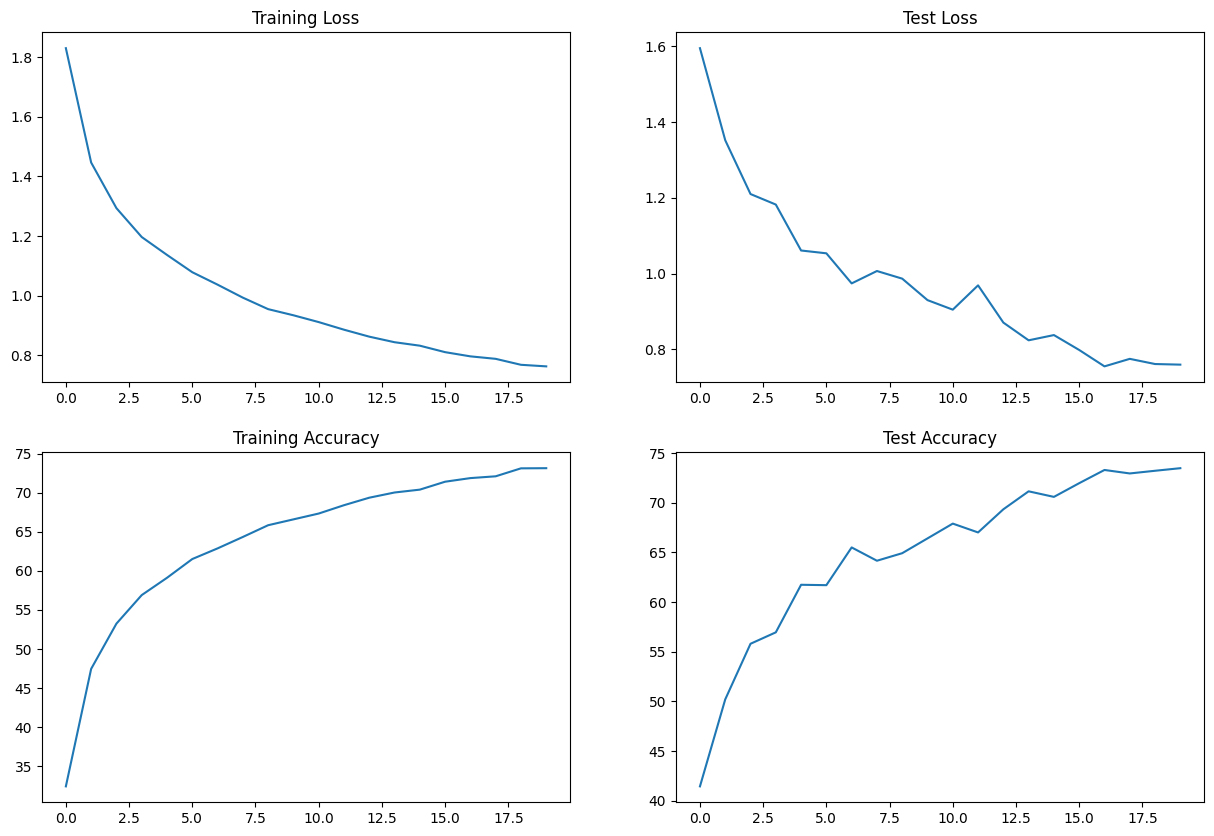

In [11]:
plot_losses()

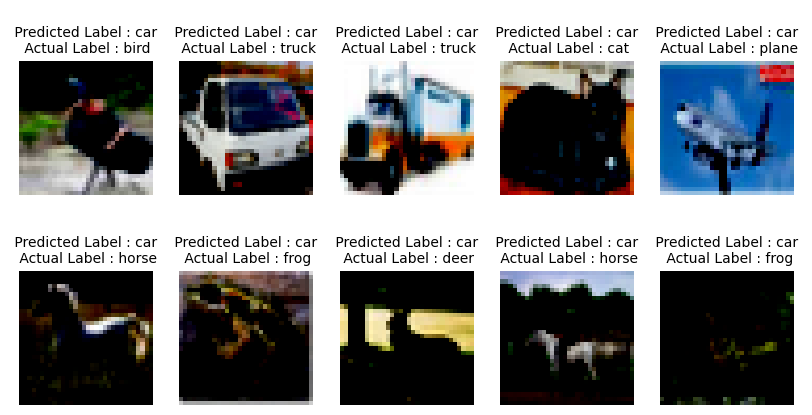

In [12]:
wrong_prediction_list = []
model1.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    output = model1(images)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the maximum probabilities
    match = pred.eq(labels.view_as(pred)).to('cpu').numpy()
    for j, i in enumerate(match):
        if(i == False):
            wrong_prediction_list.append((images[j], pred[j].item(), labels[j].item()))
plot_incorrect_prediction(wrong_prediction_list, n=10 )